In [83]:
import pandas as pd
import numpy as np
import rasterio
import geopandas as gpd
import earthpy.plot as ep
import os
import imageio
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import glob
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import cv2

In [84]:
os.getcwd()

'c:\\Users\\Rehan Ibrahim\\OneDrive - HEC Paris\\Desktop\\methane-hackathon'

In [85]:
with rasterio.open("data/dataset/train_data/images/plume/20230101_methane_mixing_ratio_id_4928.tif") as src:
    img = src.read(1)
    
img_meta =src.meta
img_meta
src.res

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1.0, 1.0)

In [86]:
meta_df = pd.read_csv('data/dataset/train_data/metadata.csv')

In [87]:
meta_df[['lat','lon']].value_counts()

lat        lon       
29.631951   35.952379    21
32.713854   44.609398    19
33.990812   39.641866    18
28.510000   77.442400    17
36.596520   38.321405    15
                         ..
21.039986  -77.824694     1
24.907500   67.023000     1
23.763333   86.396667     1
23.740000   90.595000     1
68.570113   25.563059     1
Length: 101, dtype: int64

In [88]:
meta_df.head()

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...


In [89]:
meta_df['path'] = 'data/dataset/train_data/' + meta_df['path'].astype(str) 
meta_df['path'] =  meta_df['path'].astype(str) +'.tif'

In [90]:
meta_df

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,data/dataset/train_data/images/plume/20230223_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,data/dataset/train_data/images/plume/20230103_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,data/dataset/train_data/images/plume/20230301_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,data/dataset/train_data/images/plume/20230225_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,data/dataset/train_data/images/plume/20230105_...
...,...,...,...,...,...,...,...,...,...
425,20230302,id_6658,no,train,30.965619,34.541283,39,36,data/dataset/train_data/images/no_plume/202303...
426,20230218,id_4690,no,train,35.950275,40.267652,29,28,data/dataset/train_data/images/no_plume/202302...
427,20230213,id_2519,no,train,49.963801,6.016938,23,10,data/dataset/train_data/images/no_plume/202302...
428,20230213,id_5510,no,train,32.713854,44.609398,55,54,data/dataset/train_data/images/no_plume/202302...


In [91]:
meta_df['plume'] = meta_df['plume'].map({'yes': 1, 'no': 0})

In [92]:
meta_df

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,1,train,31.528750,74.330625,24,47,data/dataset/train_data/images/plume/20230223_...
1,20230103,id_2542,1,train,35.538000,112.524000,42,37,data/dataset/train_data/images/plume/20230103_...
2,20230301,id_6546,1,train,21.060000,84.936667,58,15,data/dataset/train_data/images/plume/20230301_...
3,20230225,id_6084,1,train,26.756667,80.973333,28,62,data/dataset/train_data/images/plume/20230225_...
4,20230105,id_2012,1,train,34.800000,40.770000,59,44,data/dataset/train_data/images/plume/20230105_...
...,...,...,...,...,...,...,...,...,...
425,20230302,id_6658,0,train,30.965619,34.541283,39,36,data/dataset/train_data/images/no_plume/202303...
426,20230218,id_4690,0,train,35.950275,40.267652,29,28,data/dataset/train_data/images/no_plume/202302...
427,20230213,id_2519,0,train,49.963801,6.016938,23,10,data/dataset/train_data/images/no_plume/202302...
428,20230213,id_5510,0,train,32.713854,44.609398,55,54,data/dataset/train_data/images/no_plume/202302...


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


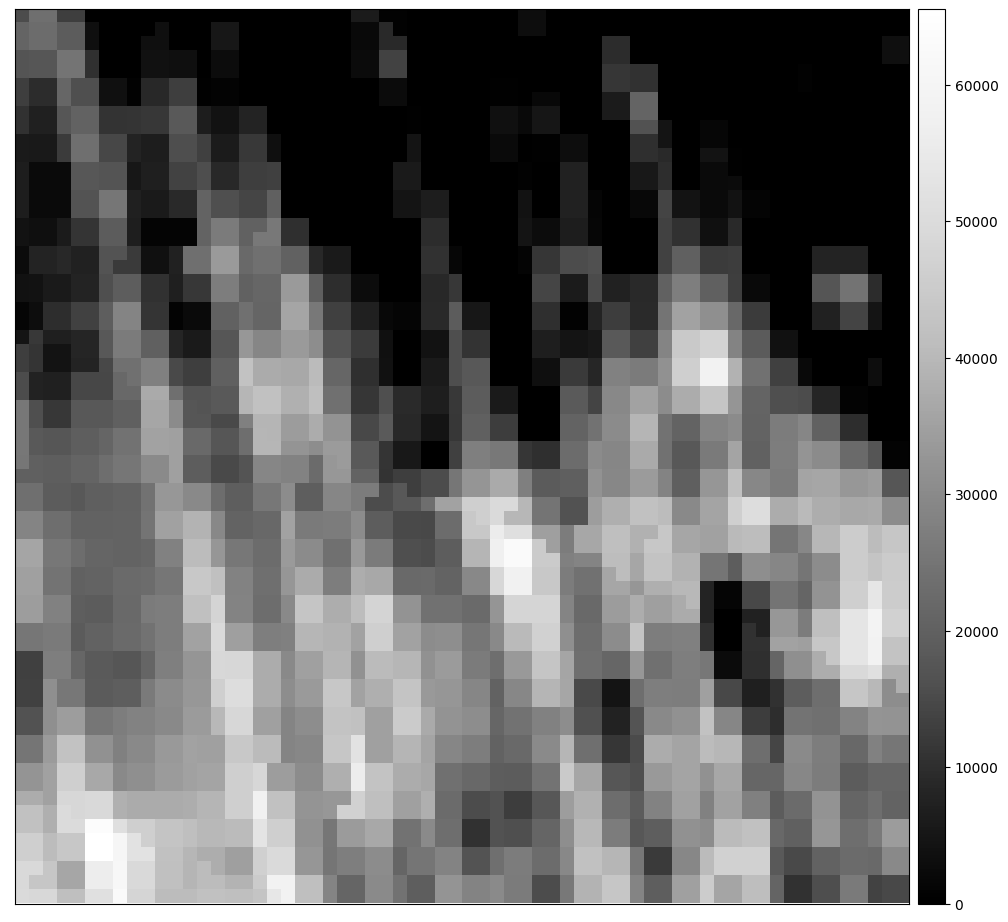

<AxesSubplot: >

In [93]:
with rasterio.open('data/dataset/train_data/images/plume/20230223_methane_mixing_ratio_id_6675.tif') as src:
    img = src.read(1)
ep.plot_bands(img)

In [94]:
image_data = []
plume_labels = []

# Loop through the metadata and load images
for index, row in meta_df.iterrows():
    image_path = row['path']
    plume_label = row['plume']

    # Read the TIFF image using rasterio
    try:
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming single-band image, adjust if necessary
            # You may want to resize or preprocess the image here if necessary

        # Append the image data and plume label to their respective lists
        image_data.append(image)
        plume_labels.append(plume_label)
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

# Convert the lists into NumPy arrays
image_data = np.array(image_data)
plume_labels = np.array(plume_labels)

In [95]:
plume_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
image_data

array([[[15373, 23745, 23745, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,  3348,  3348],
        ...,
        [49287, 49287, 43637, ..., 22215, 29933, 29933],
        [49287, 43637, 43637, ..., 13711, 14626, 14626],
        [49834, 48903, 48903, ..., 13711, 14626, 14626]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        ...,
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 4225,     0,  4100, ...,     0,     0,     0]],

       [[14118,  9487,  9487, ..., 25601, 22138, 22138],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        ...,
        [14918, 14918, 16676, ..., 18546,     0,     0],
        [14918, 14918, 16676, ..., 18546,    

In [97]:
min_val = image_data.min()
max_val = image_data.max()

# Normalize the image data
normalized_image_data = (image_data - min_val) / (max_val - min_val)
normalized_image_data

array([[[0.23457694, 0.36232547, 0.36232547, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.05108721, 0.05108721],
        ...,
        [0.75207141, 0.75207141, 0.66585794, ..., 0.33897917,
         0.4567483 , 0.4567483 ],
        [0.75207141, 0.66585794, 0.66585794, ..., 0.20921645,
         0.22317845, 0.22317845],
        [0.7604181 , 0.74621195, 0.74621195, ..., 0.20921645,
         0.22317845, 0.22317845]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.05917449, 0.10644694, 0.09991608, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [98]:
X = normalized_image_data
y = plume_labels


#X = [np.transpose(image, (1, 2, 0)) for image in X]

#X = np.array(X)
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (344, 64, 64)
X_test shape: (86, 64, 64)


In [99]:
y_train

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [100]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
X_train = X_train.reshape(-1,64,64,1)
batch_size=32
steps_per_epoch = len(X_train) // batch_size
# Fit the data augmentation generator to your training data
datagen.fit(X_train)

augmented_images = []
augmented_labels = []

# Generate augmented images and labels
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size,shuffle=True):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) >= len(X_train):
        break

X_train_augmented = np.concatenate(augmented_images)
y_train_augmented = np.concatenate(augmented_labels)

y_train_augmented = y_train_augmented.astype(int)

In [101]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the random seed for reproducibility
tf.random.set_seed(1234)

# Define the CNN model
model = tf.keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output for fully connected layers
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Print the model summary to view the architecture
model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,           
    restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

In [102]:
tf.random.set_seed(1234)
batch_size = 32
epochs = 100
model.fit(X_train_augmented,y_train_augmented, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[early_stopping])

# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

Epoch 1/100
303/303 [==============================] - 22s 68ms/step - loss: 0.4793 - accuracy: 0.7659 - val_loss: 0.3262 - val_accuracy: 0.8680
Epoch 2/100
303/303 [==============================] - 19s 64ms/step - loss: 0.2820 - accuracy: 0.8852 - val_loss: 0.2181 - val_accuracy: 0.8978
Epoch 3/100
303/303 [==============================] - 20s 65ms/step - loss: 0.1597 - accuracy: 0.9381 - val_loss: 0.0975 - val_accuracy: 0.9628
Epoch 4/100
303/303 [==============================] - 19s 64ms/step - loss: 0.0956 - accuracy: 0.9652 - val_loss: 0.1413 - val_accuracy: 0.9405
Epoch 5/100
303/303 [==============================] - 19s 64ms/step - loss: 0.0564 - accuracy: 0.9795 - val_loss: 0.0509 - val_accuracy: 0.9814
Epoch 6/100
303/303 [==============================] - 20s 65ms/step - loss: 0.0461 - accuracy: 0.9840 - val_loss: 0.0831 - val_accuracy: 0.9693
Epoch 7/100
303/303 [==============================] - 19s 62ms/step - loss: 0.0335 - accuracy: 0.9870 - val_loss: 0.0564 - val_ac

array([[6.1163888e-08],
       [6.8542790e-01],
       [2.7801752e-02],
       [9.9999988e-01],
       [2.8894506e-10],
       [9.8486543e-01],
       [1.0000000e+00],
       [9.9999982e-01],
       [9.9999869e-01],
       [6.0931009e-01],
       [1.4310634e-06],
       [2.7733020e-07],
       [8.9987582e-01],
       [2.8791642e-09],
       [9.9900353e-01],
       [9.9999213e-01],
       [1.8586263e-05],
       [2.6658565e-05],
       [9.9933547e-01],
       [4.0329094e-03],
       [1.1040207e-08],
       [5.5656296e-11],
       [3.1270424e-06],
       [1.0000000e+00],
       [1.3594404e-03],
       [9.9841255e-01],
       [9.9999082e-01],
       [1.6046223e-16],
       [1.0012696e-03],
       [1.9987560e-13],
       [9.9994642e-01],
       [2.0445271e-14],
       [3.2688033e-02],
       [1.8147524e-02],
       [1.2269268e-17],
       [9.9979252e-01],
       [9.9996185e-01],
       [7.3059745e-24],
       [8.6224417e-04],
       [2.9767411e-09],
       [3.5027972e-17],
       [9.999056

In [103]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

In [104]:
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.56%


(array([40.,  1.,  0.,  1.,  2.,  0.,  2.,  0.,  3., 37.]),
 array([7.30597453e-24, 1.00000001e-01, 2.00000003e-01, 3.00000012e-01,
        4.00000006e-01, 5.00000000e-01, 6.00000024e-01, 6.99999988e-01,
        8.00000012e-01, 8.99999976e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

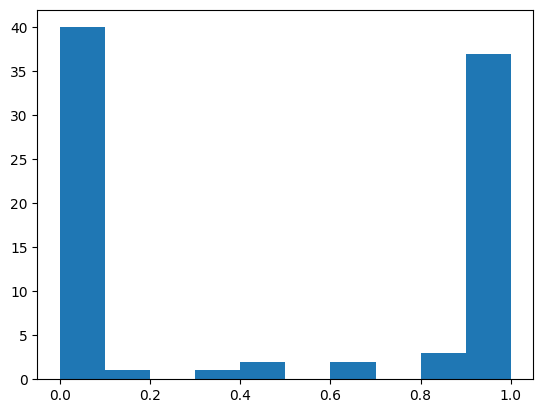

In [105]:
plt.hist(predictions.squeeze())

In [106]:
tn,fpn,fn,tp = confusion_matrix(y_test, binary_predictions).ravel()

In [107]:
class_report = classification_report(y_test, binary_predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.93      0.76      0.84        51

    accuracy                           0.83        86
   macro avg       0.83      0.84      0.82        86
weighted avg       0.85      0.83      0.83        86



In [108]:
pd.Series(binary_predictions.squeeze()).value_counts()

0    44
1    42
dtype: int64

In [109]:
# Calculate accuracy using one-hot encoded labels
accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 82.56%


In [129]:
# Specify the path to the folder containing TIFF files
folder_path = "data/dataset/test_data/images/"

# Use glob to get a list of TIFF files in the folder
tiff_files = glob.glob(folder_path + "/*.tif")

# Create a Pandas Series from the list of file paths
file_series = pd.Series(tiff_files)

# Display the Pandas Series
print(file_series)

0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object


In [130]:
t_df = pd.read_csv('data/dataset/test_data/metadata.csv')
t_df.head()

,date,id_coord,lat,lon,coord_x,coord_y
0,20230213,id_6148,23.437500,90.645000,54,10
1,20230206,id_3348,33.513333,-87.203333,31,55
2,20230121,id_3733,26.424286,80.284286,33,44
3,20230204,id_5491,30.246667,71.483333,59,59
4,20230130,id_4287,23.763333,86.396667,46,46


In [131]:
# Replace forward slashes with backslashes in the Pandas Series
file_series = file_series.str.replace('//', '/')

# Display the modified Pandas Series
print(file_series)


0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object


In [132]:
file_series

0      data/dataset/test_data/images\20230101_methane...
1      data/dataset/test_data/images\20230101_methane...
2      data/dataset/test_data/images\20230101_methane...
3      data/dataset/test_data/images\20230103_methane...
4      data/dataset/test_data/images\20230103_methane...
                             ...                        
103    data/dataset/test_data/images\20230404_methane...
104    data/dataset/test_data/images\20230404_methane...
105    data/dataset/test_data/images\20230405_methane...
106    data/dataset/test_data/images\20230405_methane...
107    data/dataset/test_data/images\20230406_methane...
Length: 108, dtype: object

In [133]:
file_series = pd.Series(file_series)

In [134]:
import rasterio
import numpy as np

image_data = []

# Loop through the file paths and load images
for image_path in file_series:
    # Read the TIFF image using rasterio
    try:
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming single-band image, adjust if necessary
            # You may want to resize or preprocess the image here if necessary

        # Append the image data to the list
        image_data.append(image)
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

# Convert the list of images into a NumPy array
image_data = np.array(image_data)


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [135]:
image_data

array([[[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ..., 29683,     0,     0],
        [    0,     0,     0, ..., 29683,     0,     0],
        ...,
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0]],

       [[25168, 28921, 28921, ...,     0,     0,     0],
        [22639, 24216, 24216, ...,     0,     0,     0],
        [22639, 24216, 24216, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ..., 13551, 13551,  7718],
        [    0,     0,     0, ...,  9699,  9699,  8373],
        [    0,  6476,  6476, ...,  9699,  9699,  8373]],

       [[12106, 12106, 12106, ...,     0,     0,     0],
        [12106, 12106, 12106, ...,     0,     0,     0],
        [15077, 15077, 13342, ...,     0,     0,     0],
        ...,
        [    0,     0,     0, ...,  7122,  7122,  7122],
        [    0,     0,     0, ...,  8842,  88

In [136]:
min_val = image_data.min()
max_val = image_data.max()

# Normalize the image data
normalized_image_data = (image_data - min_val) / (max_val - min_val)
normalized_image_data

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.45293355,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.45293355,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.38403906, 0.44130617, 0.44130617, ..., 0.        ,
         0.        , 0.        ],
        [0.345449  , 0.36951247, 0.36951247, ..., 0.        ,
         0.        , 0.        ],
        [0.345449  , 0.36951247, 0.36951247, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.20677501,
         0.20677501, 0.11776913],
        [0. 

In [137]:
normalized_image_data.shape

(108, 64, 64)

In [139]:
# Make predictions on the test dataset
predictions = model.predict(normalized_image_data)
predictions

4/4 [==============================] - 0s 15ms/step


array([[9.1586787e-07],
       [9.9999881e-01],
       [9.9998999e-01],
       [1.3471130e-04],
       [1.0000000e+00],
       [9.9984318e-01],
       [9.9970692e-01],
       [8.6490495e-08],
       [1.0000000e+00],
       [3.8051032e-04],
       [9.9998891e-01],
       [9.9999994e-01],
       [9.9999917e-01],
       [9.9941546e-01],
       [9.9999994e-01],
       [5.6741748e-02],
       [4.8280403e-06],
       [6.2962569e-13],
       [1.0000000e+00],
       [3.1270424e-06],
       [9.9861127e-01],
       [5.0343893e-09],
       [1.0000000e+00],
       [6.5857072e-25],
       [4.5233031e-16],
       [8.4506532e-21],
       [3.1531436e-06],
       [9.9635363e-01],
       [2.7658963e-03],
       [1.7564623e-10],
       [1.0000000e+00],
       [1.4446563e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.8436657e-04],
       [1.9867196e-04],
       [1.3071974e-03],
       [9.8974186e-01],
       [2.5144744e-05],
       [1.7429391e-22],
       [1.5107520e-04],
       [9.999992

In [140]:
# Apply threshold to obtain binary predictions (0 or 1)
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

In [141]:
pd.Series(binary_predictions.squeeze()).value_counts()

0    60
1    48
dtype: int64